In [1]:
# import necessary libraries 
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb

## filter warning to suppress warning message
import warnings
warnings.filterwarnings("ignore")

In [2]:
## importing the dataset
stock_data = pd.read_csv("../input/stock-market-data/Stock_Market_Data.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'],dayfirst=True)
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19


# **Part 1: Data Cleaning and Exploration:**

***1.Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).***

In [3]:
summ_stat = stock_data.describe()
summ_stat

,Date,Open,High,Low,Close,Volume
count,49158,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
mean,2022-03-31 12:56:37.436836608,157.869018,159.588214,155.906364,157.351462,5.619999e+05
min,2022-01-02 00:00:00,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,2022-02-13 00:00:00,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,2022-03-30 00:00:00,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,2022-05-19 00:00:00,89.400000,90.500000,87.700000,88.700000,5.401398e+05
max,2022-06-30 00:00:00,6000.000000,6050.000000,5975.000000,6000.500000,6.593180e+07
std,NaN,520.191624,523.348078,517.136149,519.711667,1.276909e+06


***2.Explore the distribution of the 'Close' prices over time. ***

In [4]:
## randomly select 5 company
unique_names = ['01.Bank', '02.Cement', '03.Ceramics_Sector', '04.Engineering',
       '05.Financial_Institutions']

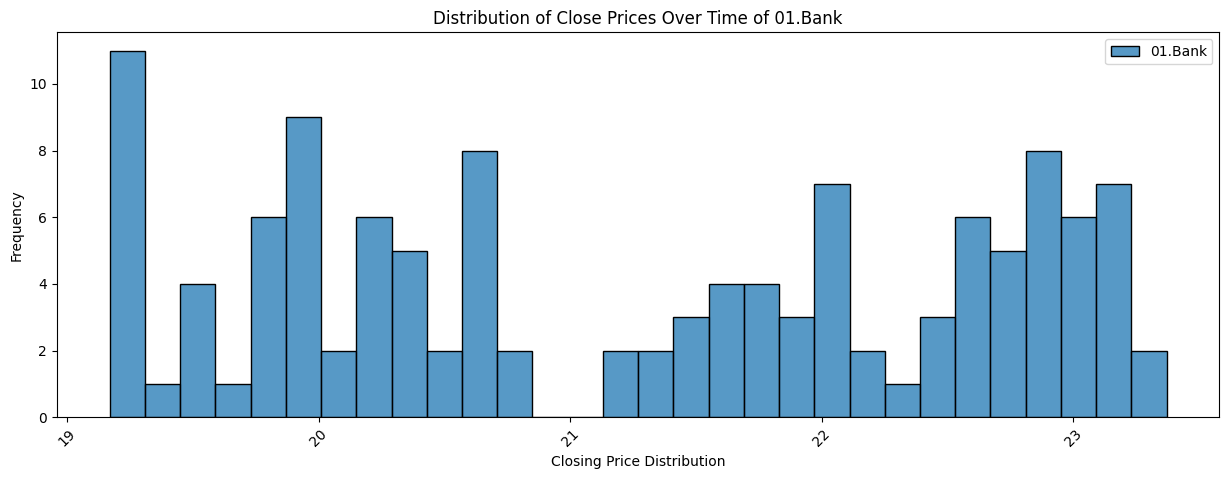

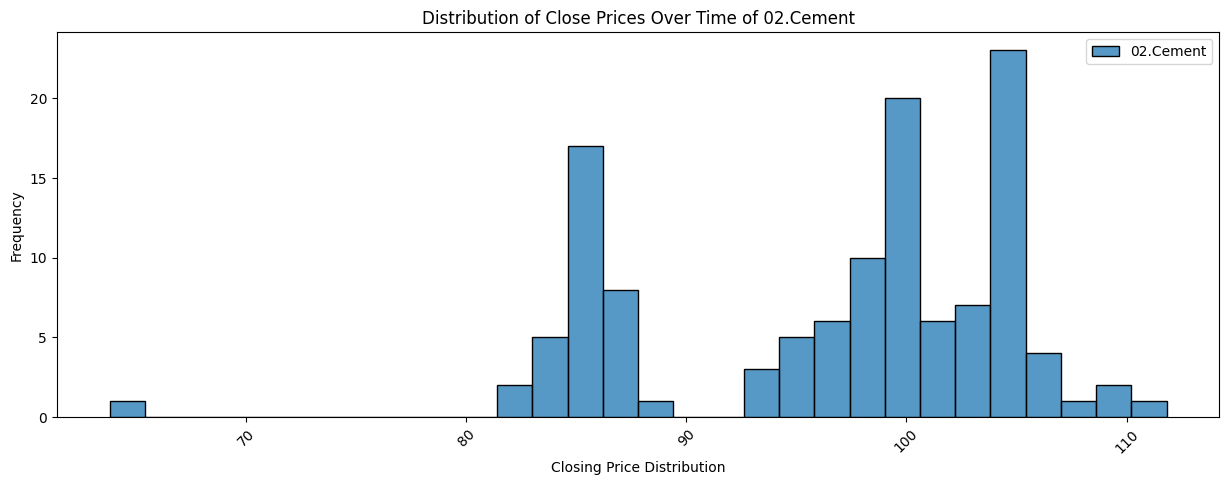

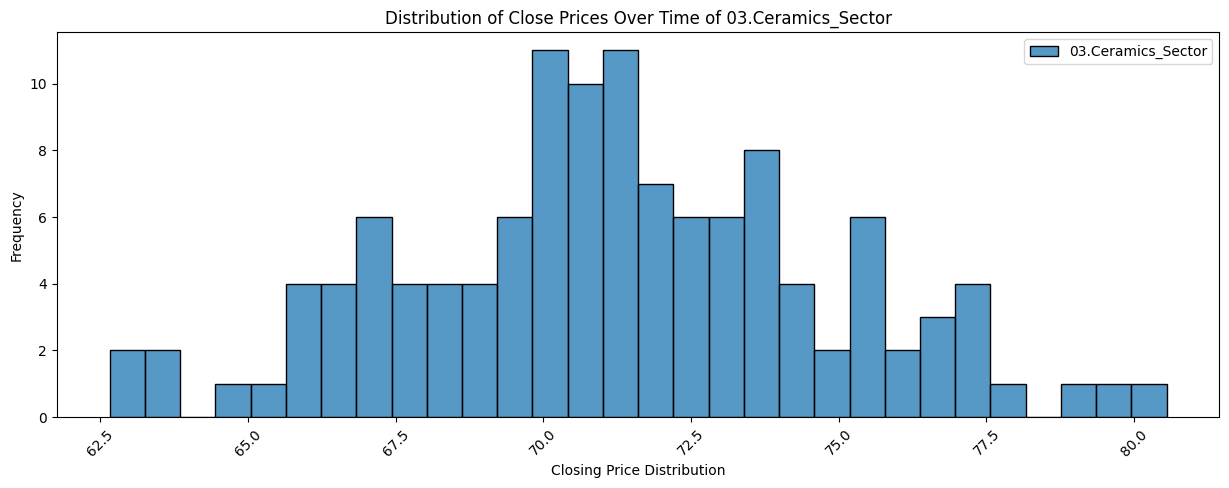

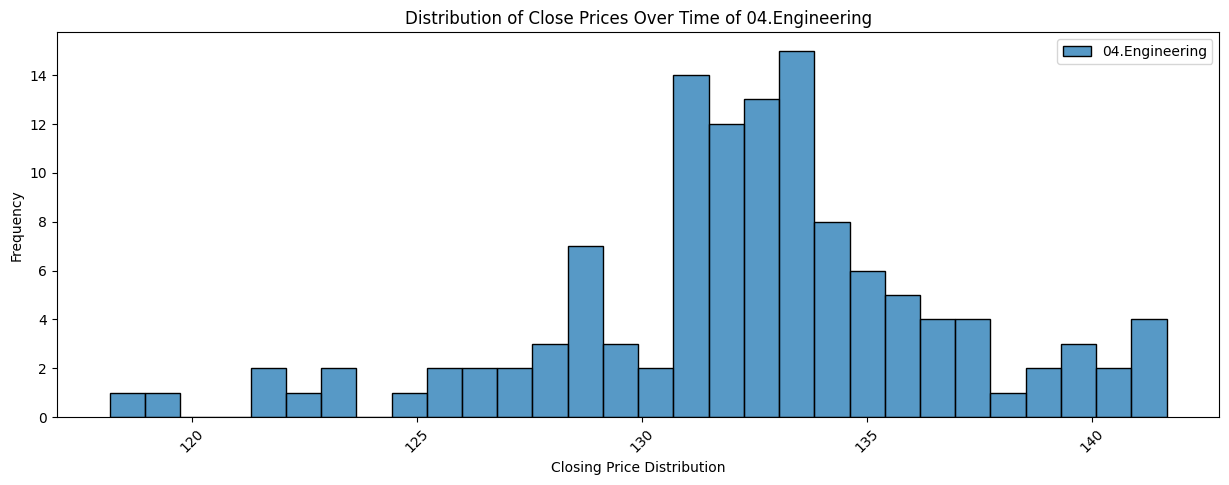

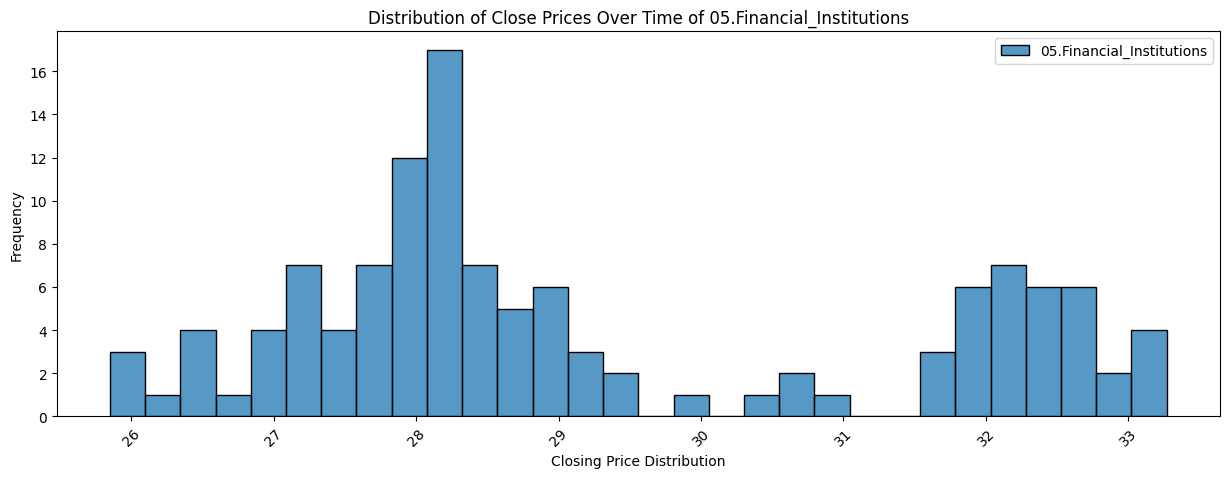

In [5]:

for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    plt.figure(figsize=(15,5))
    sns.histplot(data=company_data ,x="Close",bins=30,label=name)
    plt.xlabel("Closing Price Distribution")
    plt.ylabel("Frequency")
    plt.title("Distribution of Close Prices Over Time of {}".format(name))
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    

***3.Identify and analyze any outliers (if any) in the dataset.***

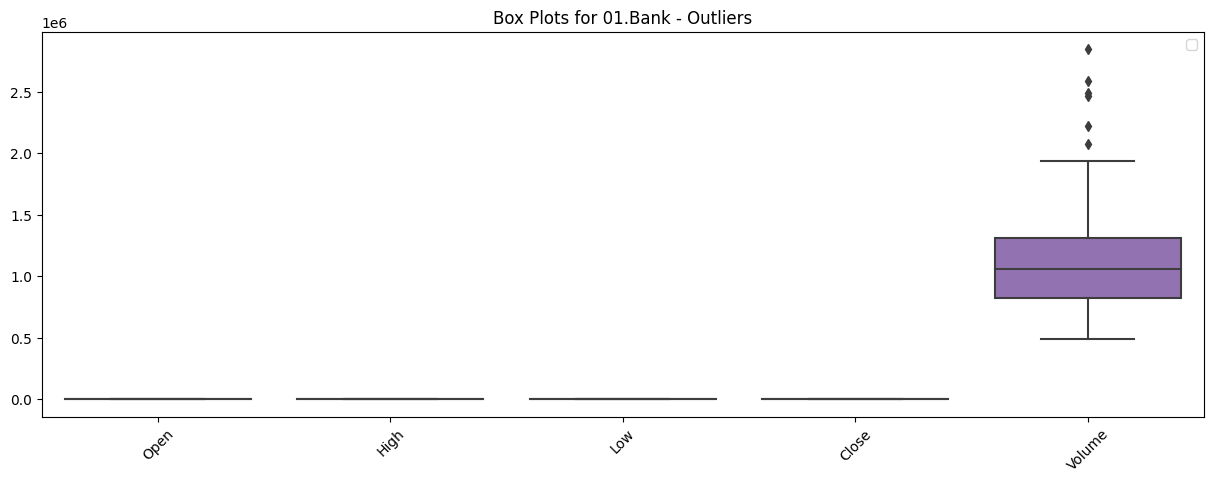

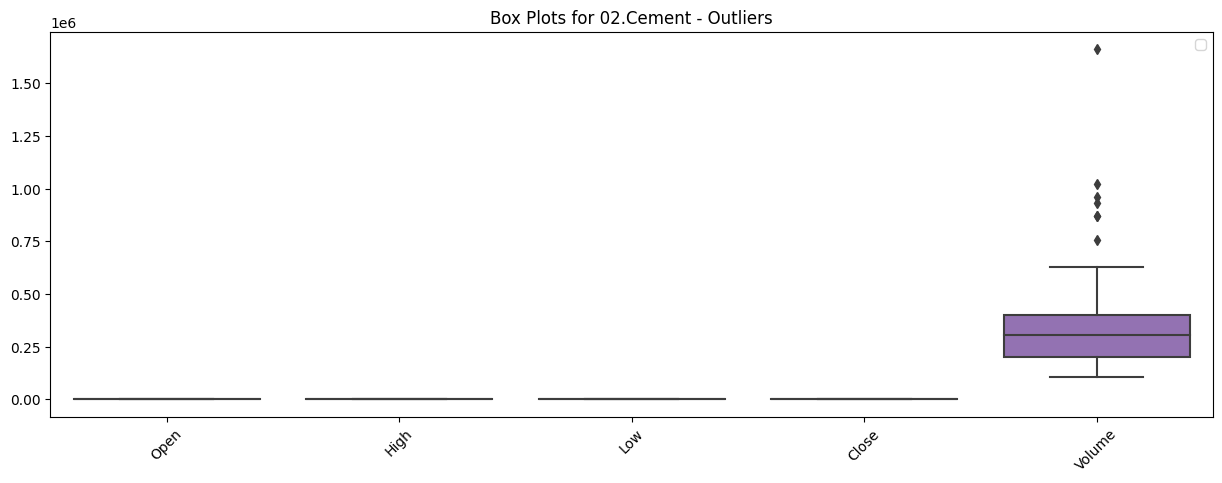

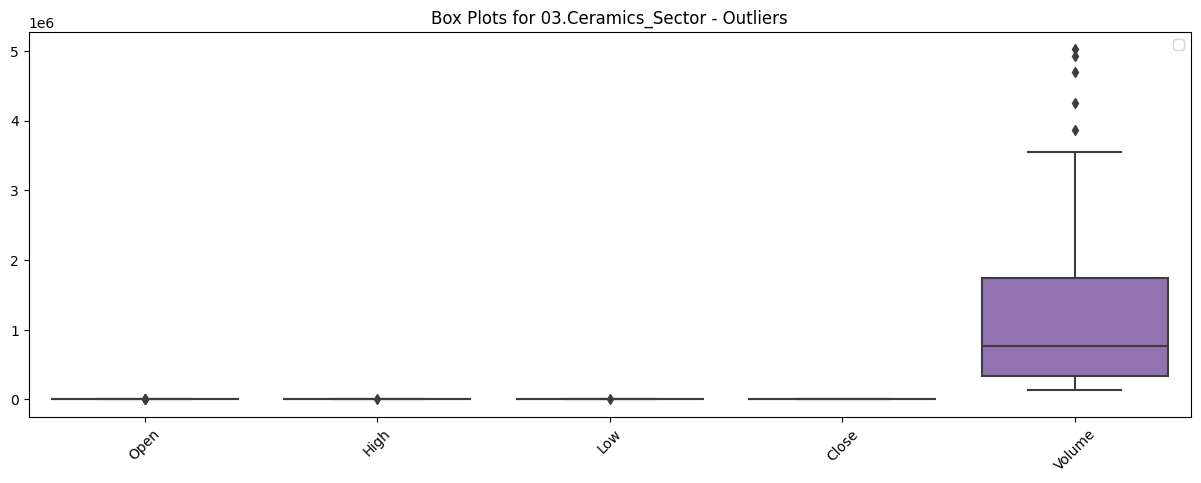

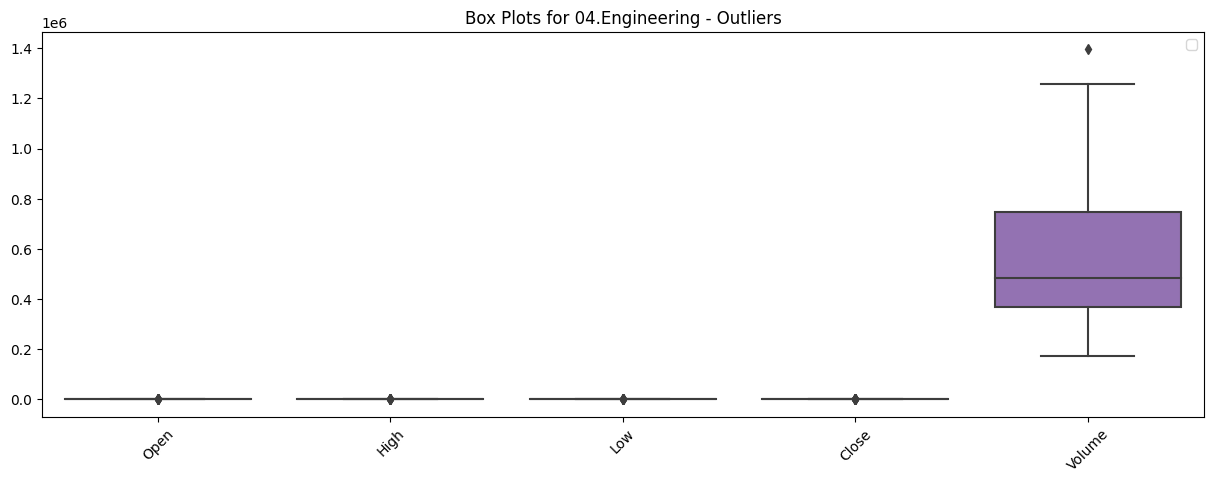

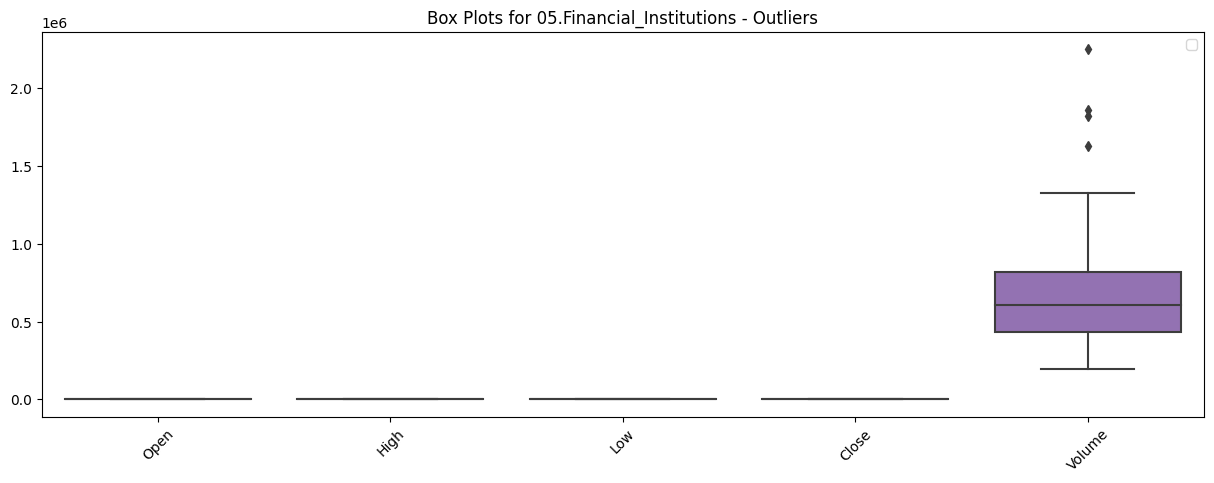

In [6]:
for name in unique_names:
    company_data = stock_data[stock_data['Name']==name]
    plt.figure(figsize=(15,5))
    sns.boxplot(data=company_data.select_dtypes(include=np.number))
    plt.title(f'Box Plots for {name} - Outliers')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# **Part 2: Time Series Analysis / Rolling Window / Moving Averages :**

***1.Create a line chart to visualize the 'Close' prices over time.***

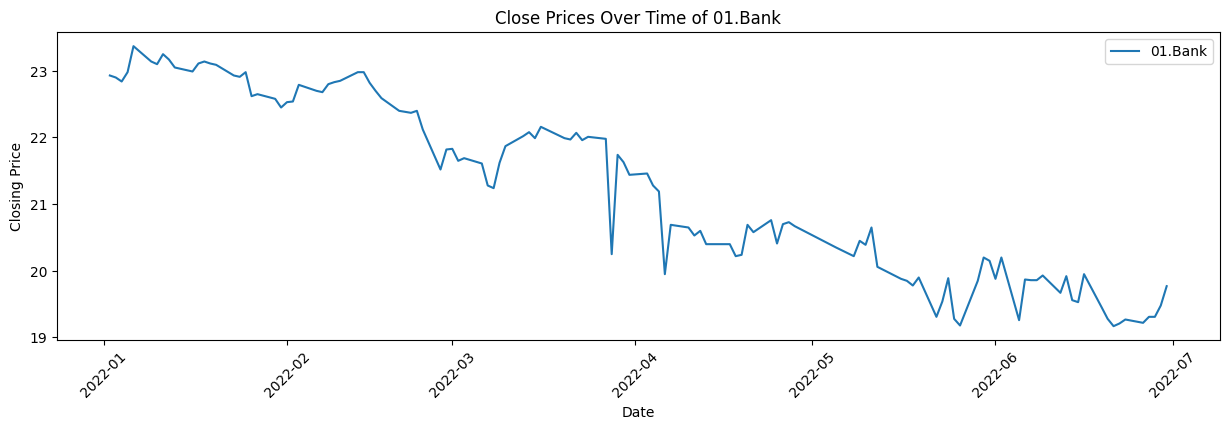

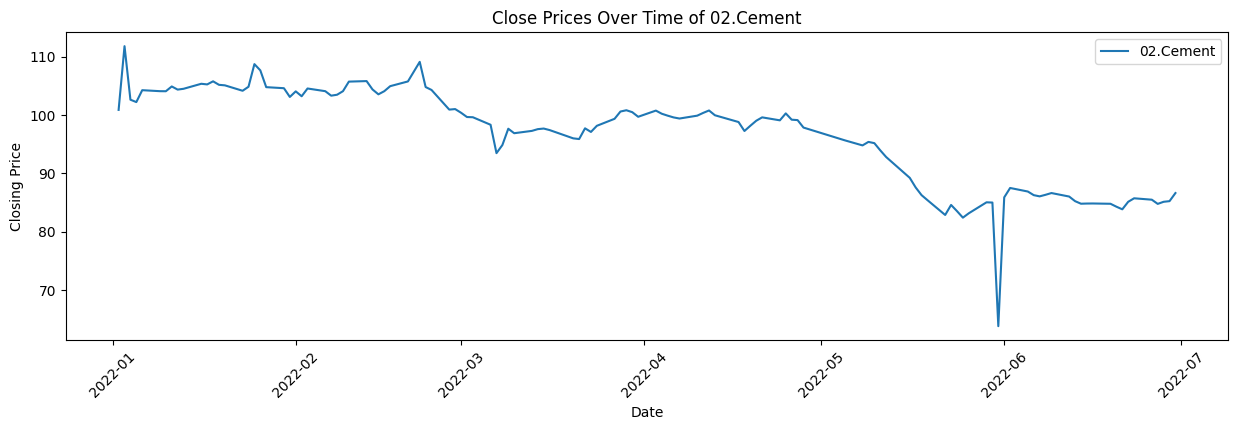

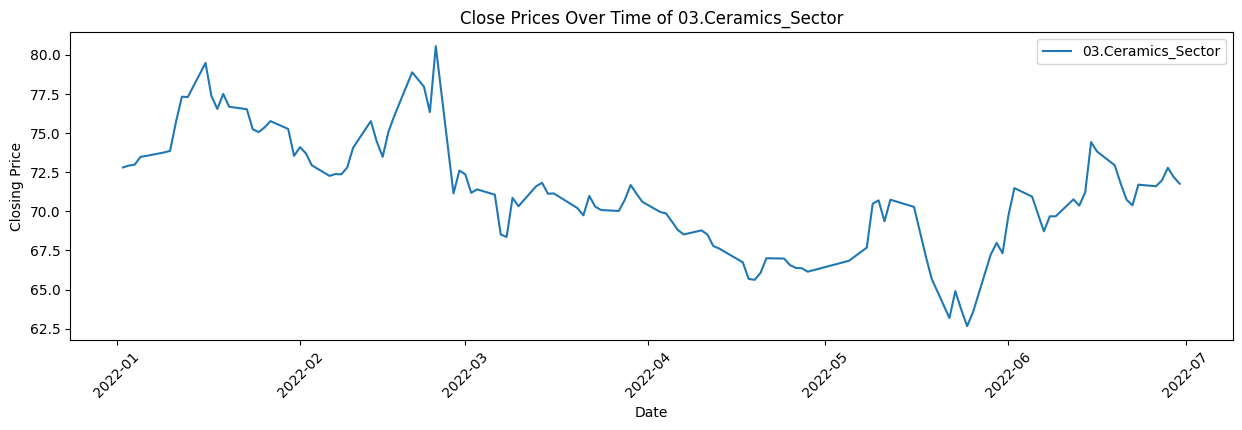

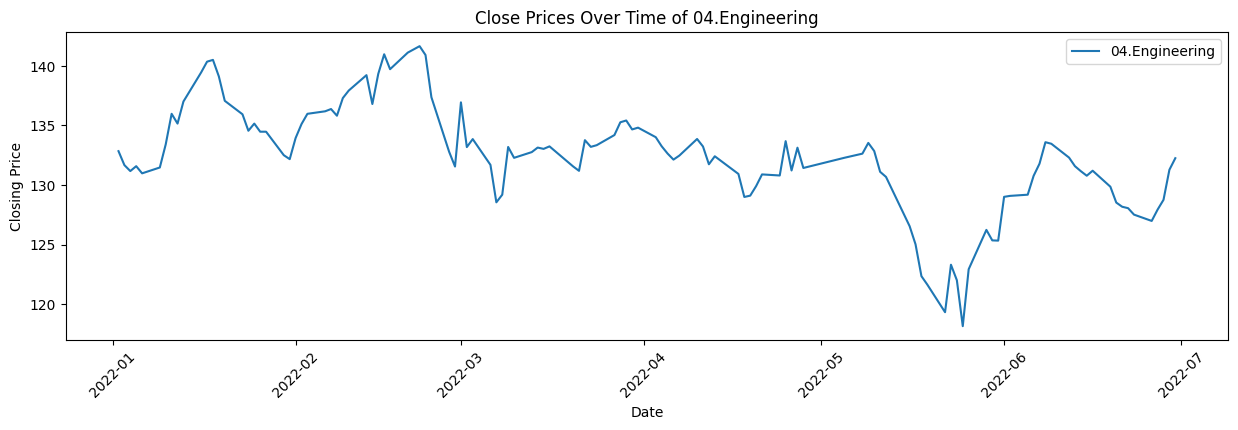

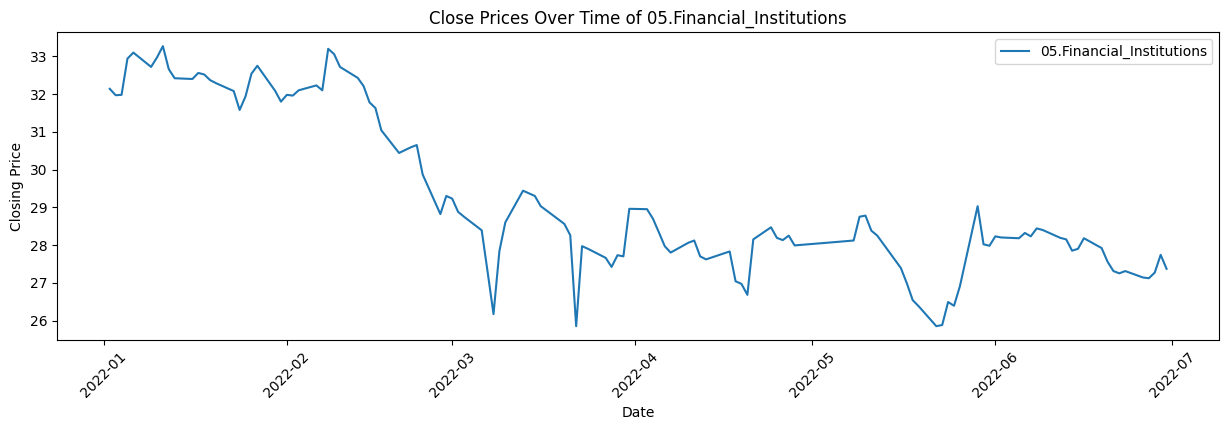

In [7]:
for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    plt.figure(figsize=(15, 4))
    plt.plot(company_data['Date'],company_data['Close'],label ="{}".format(name))
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Close Prices Over Time of {}'.format(name))
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

***2.Calculate and plot the daily percentage change in closing prices.***

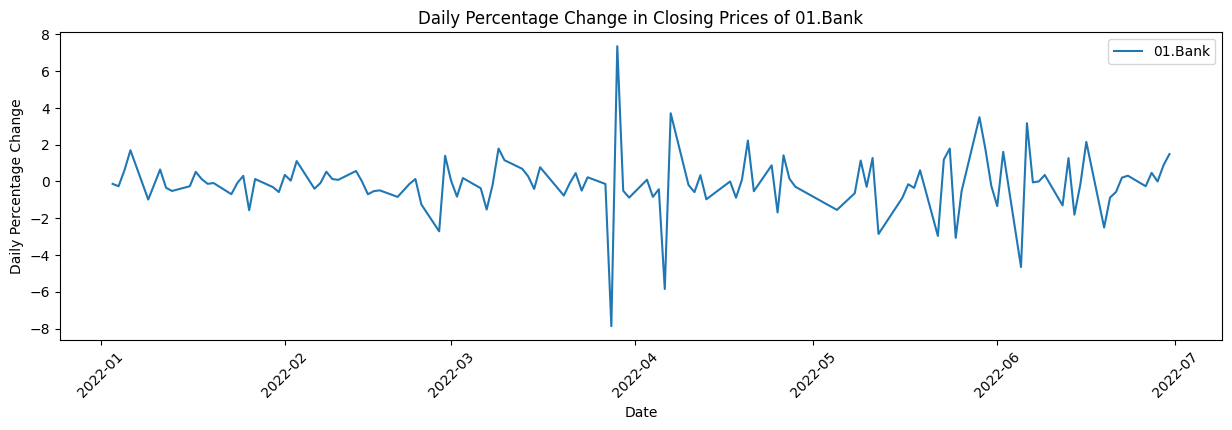

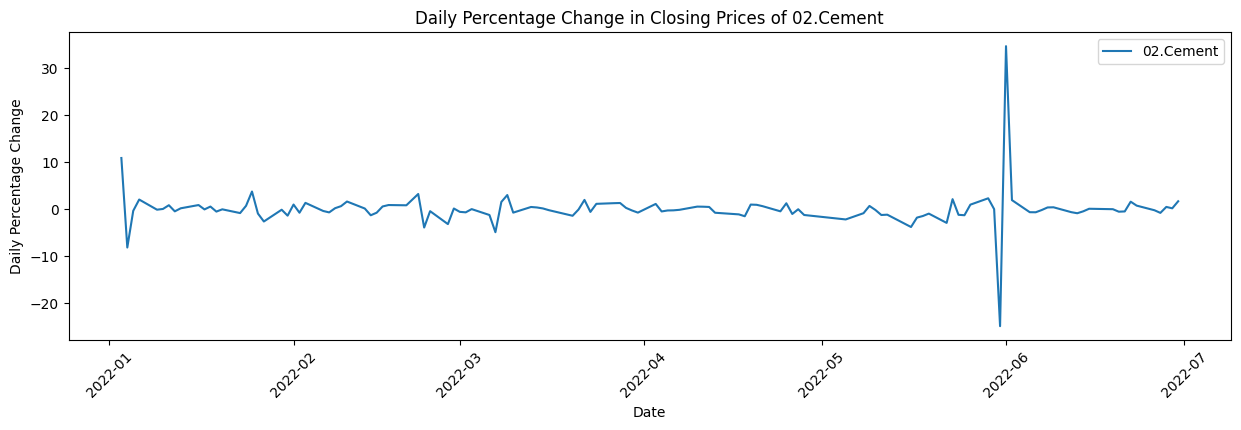

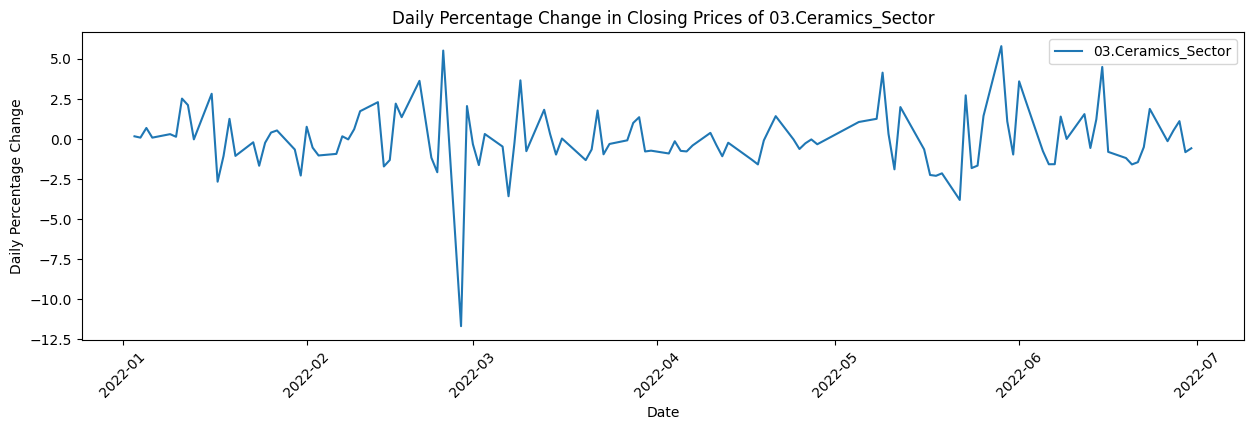

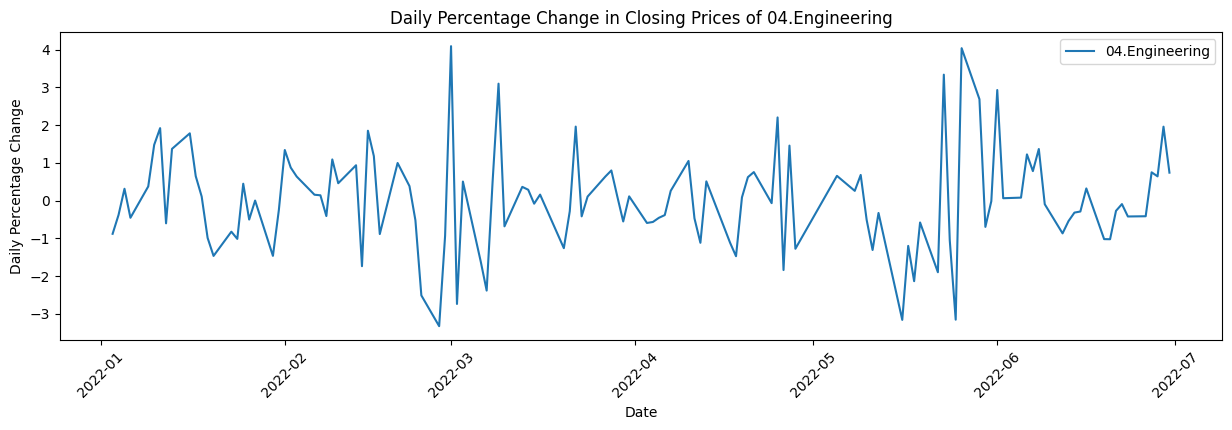

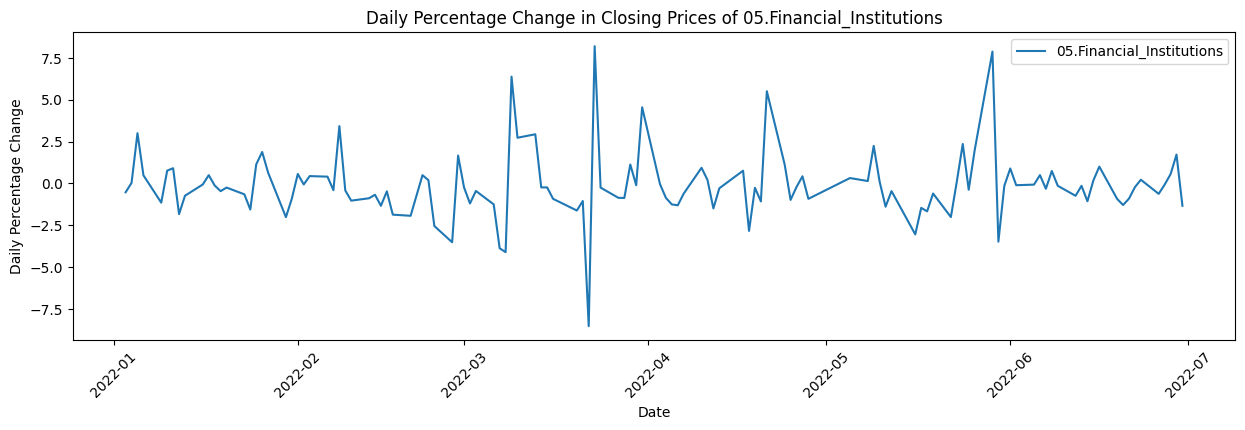

In [8]:
for name in unique_names:
    plt.figure(figsize=(15, 4))
    company_data = stock_data[stock_data['Name'] == name]
    company_data['Daily_PCT_Change'] = company_data['Close'].pct_change() * 100
    plt.plot(company_data['Date'], company_data['Daily_PCT_Change'], label=name)
    plt.xlabel('Date')
    plt.ylabel('Daily Percentage Change')
    plt.title('Daily Percentage Change in Closing Prices of {}'.format(name))
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

***3.Investigate the presence of any trends or seasonality in the stock prices.***

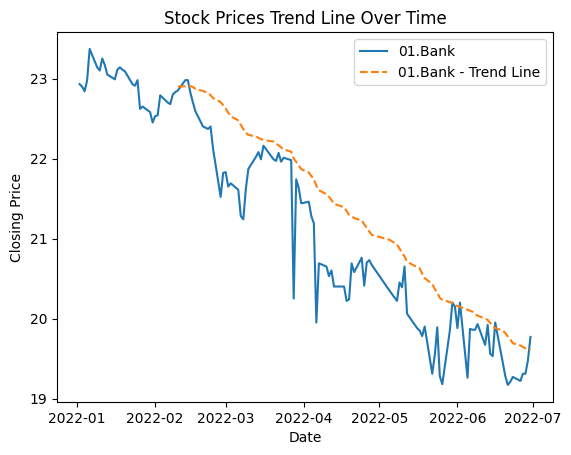

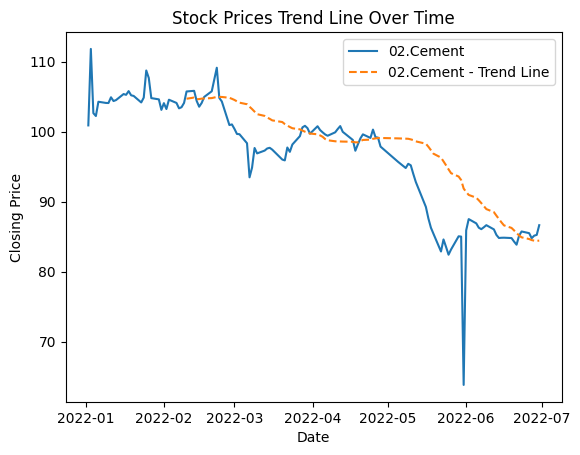

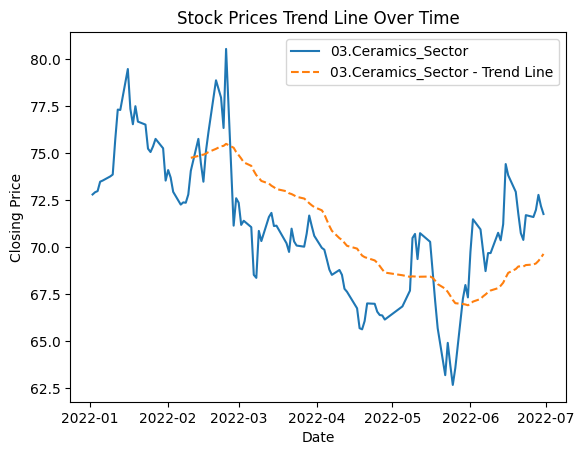

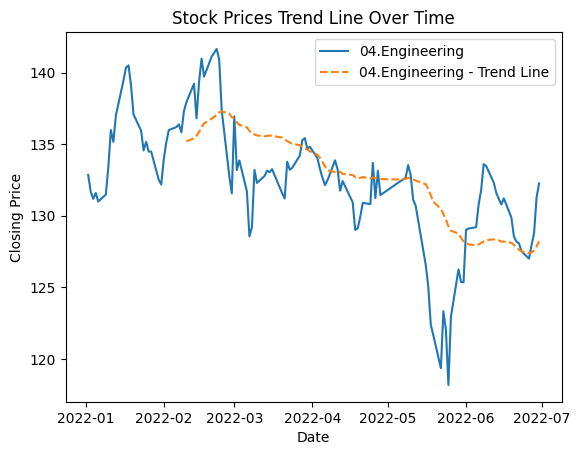

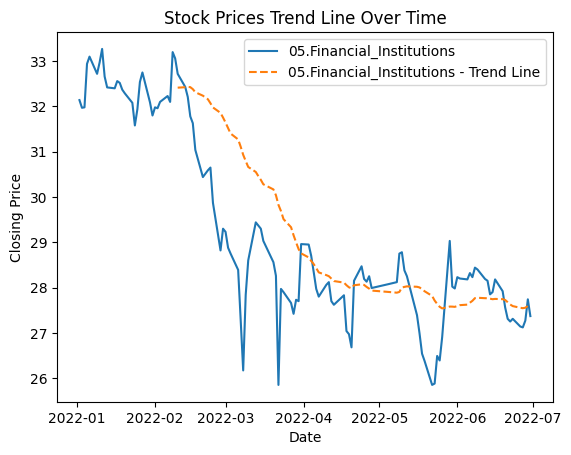

In [9]:
for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    plt.plot(company_data['Date'],company_data['Close'], label=name)
    # Plotting a rolling average (e.g., 30 days) for trend visualization
    rolling_avg = company_data['Close'].rolling(window=30).mean()
    plt.plot(company_data['Date'],rolling_avg, label=f'{name} - Trend Line', linestyle='--')
    plt.title('Stock Prices Trend Line Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

### Stock Price Trend Analysis Report

The analysis of historical stock prices for companies reveals a noticeable **downward trend**. This trend is depicted through the plotted closing prices and 30-day rolling averages. The decline suggests a potential shift in market sentiment or underlying economic factors affecting these sectors.

***4.Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.***

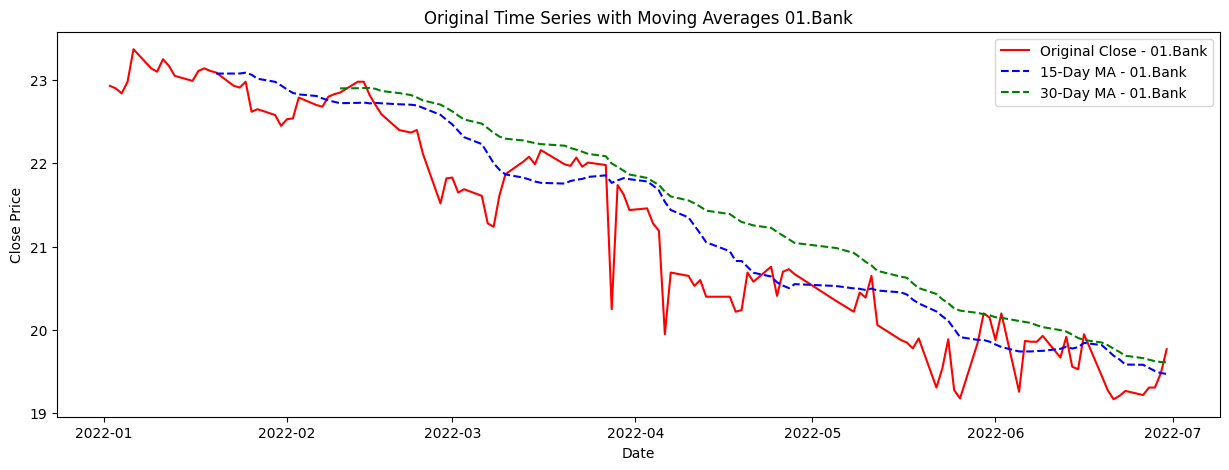

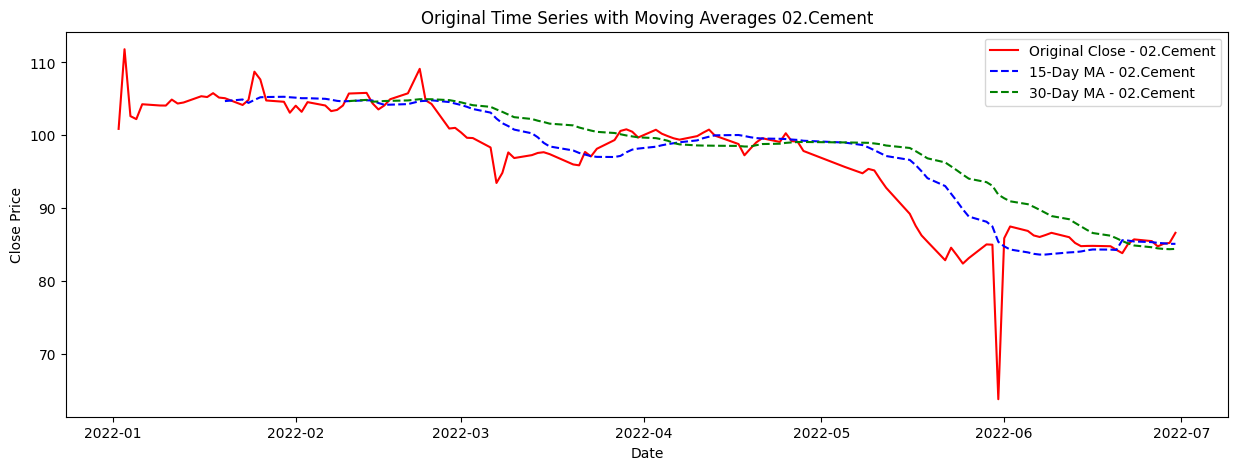

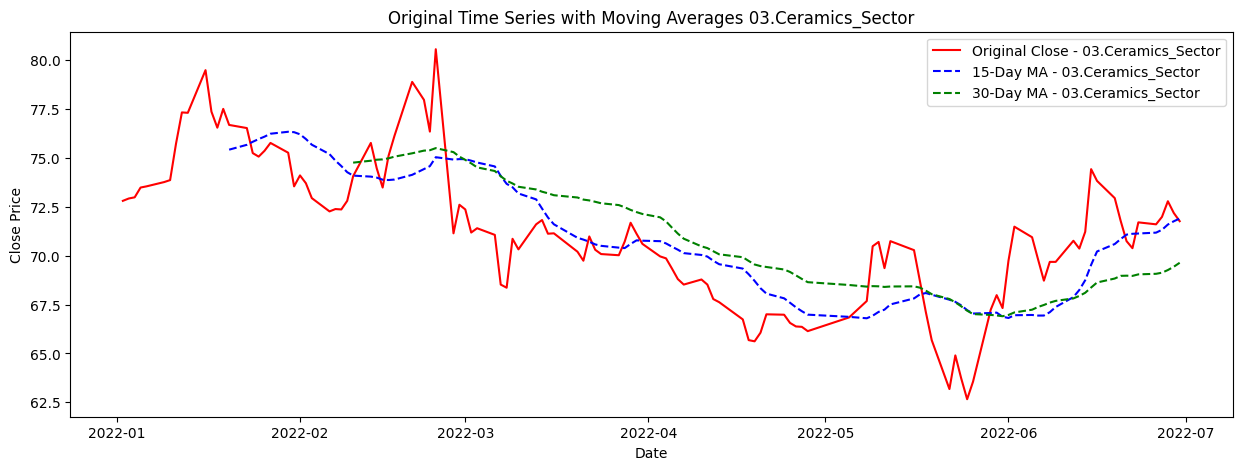

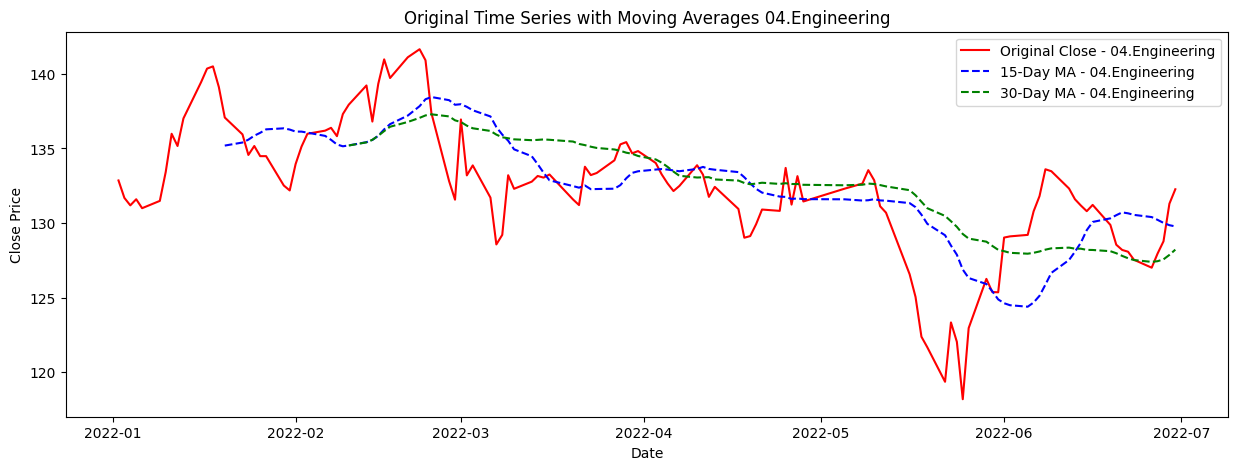

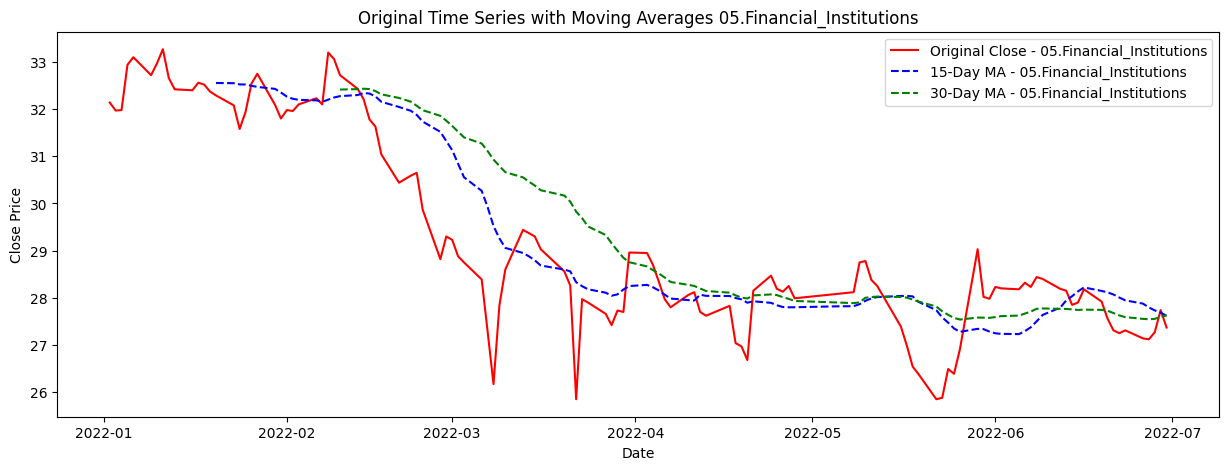

In [10]:
for name in unique_names:
    plt.figure(figsize=(15, 5))
    company_data = stock_data[stock_data['Name'] == name]
    company_data['15_Day_MA'] = company_data['Close'].rolling(window=15).mean()
    company_data['30_Day_MA'] = company_data['Close'].rolling(window=30).mean()

    # Plotting for the current company
    plt.plot(company_data['Date'], company_data['Close'], label=f'Original Close - {name}',color="red")
    plt.plot(company_data['Date'], company_data['15_Day_MA'], label=f'15-Day MA - {name}', linestyle='--',color="blue")
    plt.plot(company_data['Date'], company_data['30_Day_MA'], label=f'30-Day MA - {name}', linestyle='--',color="green")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Original Time Series with Moving Averages {}'.format(name))
    plt.legend()
    plt.show()

***5.Calculate the average closing price for each stock.***

In [11]:
df = pd.DataFrame(stock_data.groupby('Name')['Close'].mean()).reset_index()
df.columns=['Name','AvgClosingPrice']
df.head()

,Name,AvgClosingPrice
0,01.Bank,21.260902
1,02.Cement,96.600820
2,03.Ceramics_Sector,71.225164
3,04.Engineering,132.352459
4,05.Financial_Institutions,29.253525


***6. Identify the top 5 and bottom 5 stocks based on average closing price.***

In [12]:
df_sorted = df.sort_values(by='AvgClosingPrice',ascending=False)

In [13]:
top5 = df_sorted.head(5)
top5

,Name,AvgClosingPrice
56,APSCLBOND,5413.238636
320,RECKITTBEN,5342.024793
298,PREBPBOND,4918.357143
178,IBBL2PBOND,4851.330357
283,PBLPBOND,4836.195652


In [14]:
bottom5 = df_sorted.tail(5)
bottom5

,Name,AvgClosingPrice
291,PHPMF1,5.417213
293,POPULAR1MF,5.368033
149,FBFIF,5.289344
187,ICBIBANK,4.725620
144,FAMILYTEX,4.698361


# **Part 3: Volatility Analysis:**

***1.Calculate and plot the rolling standard deviation of the 'Close' prices.***

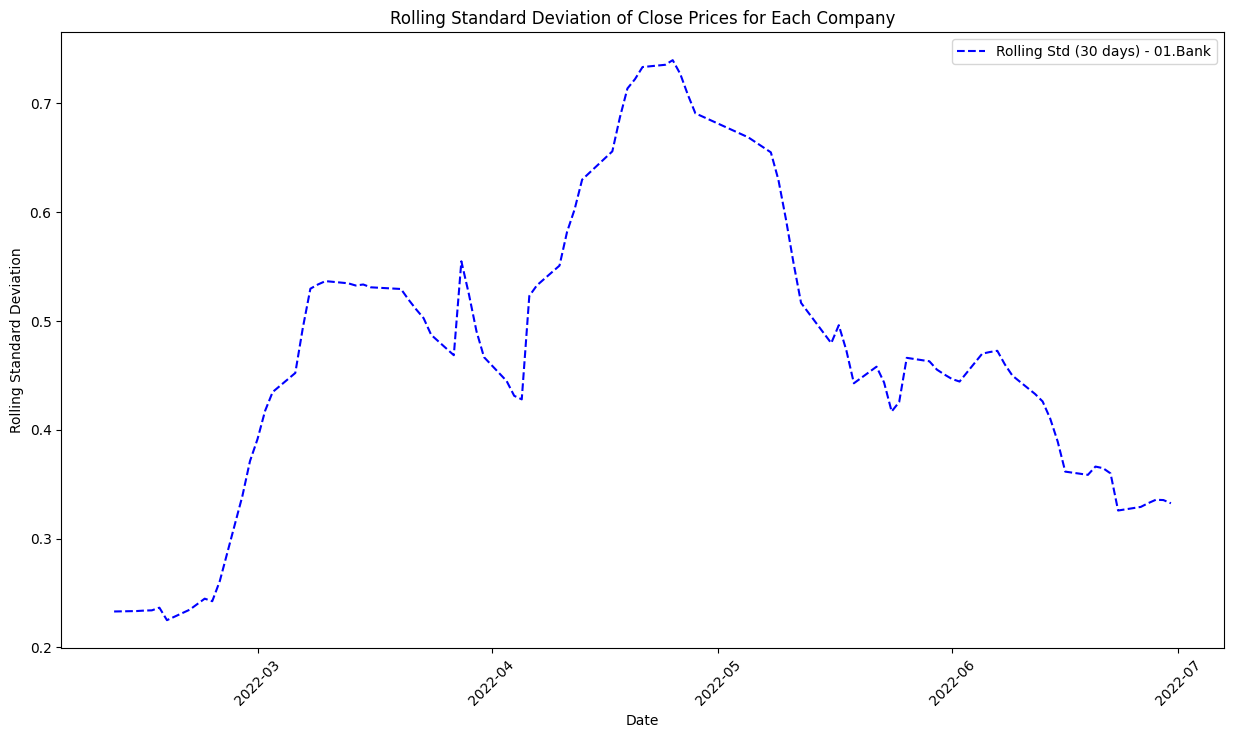

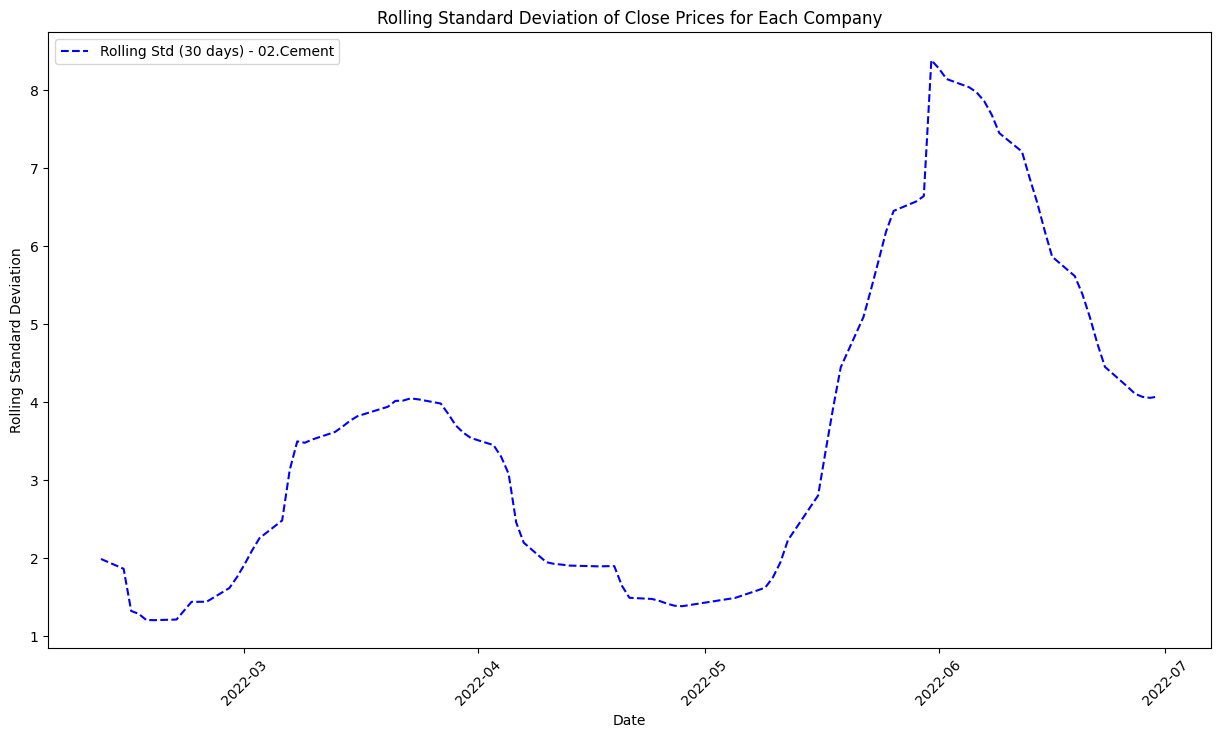

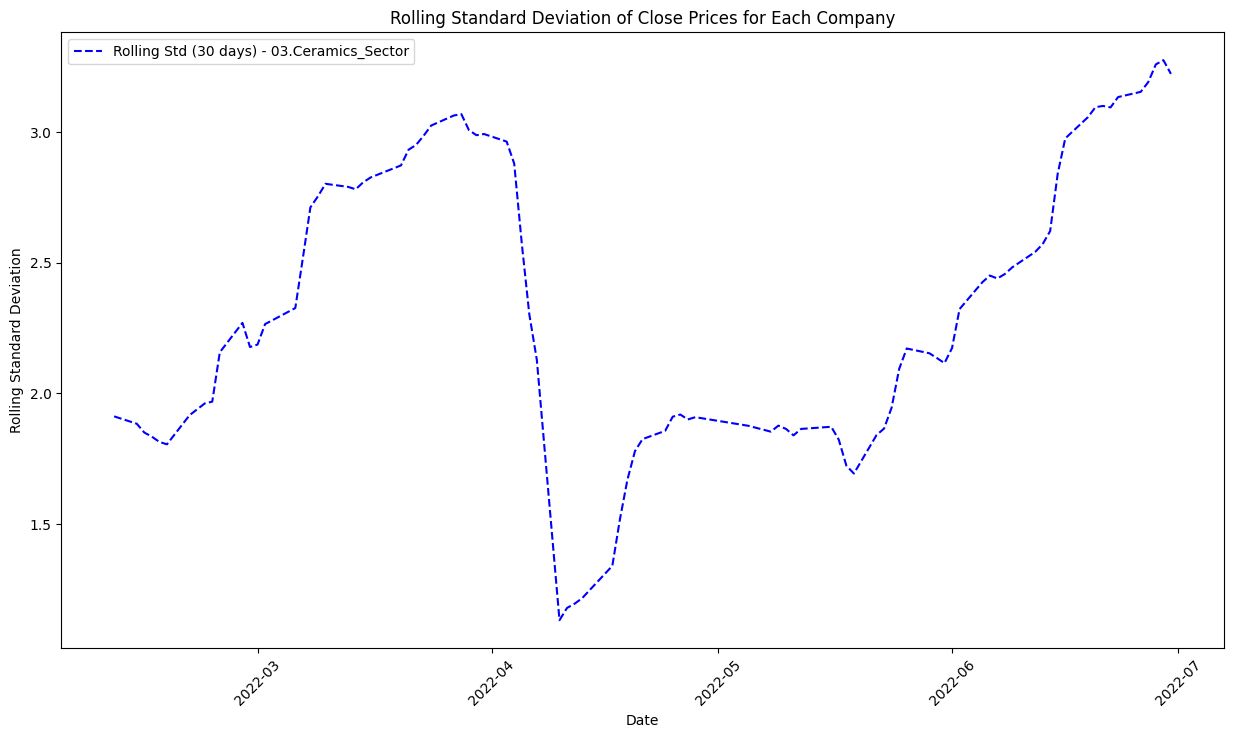

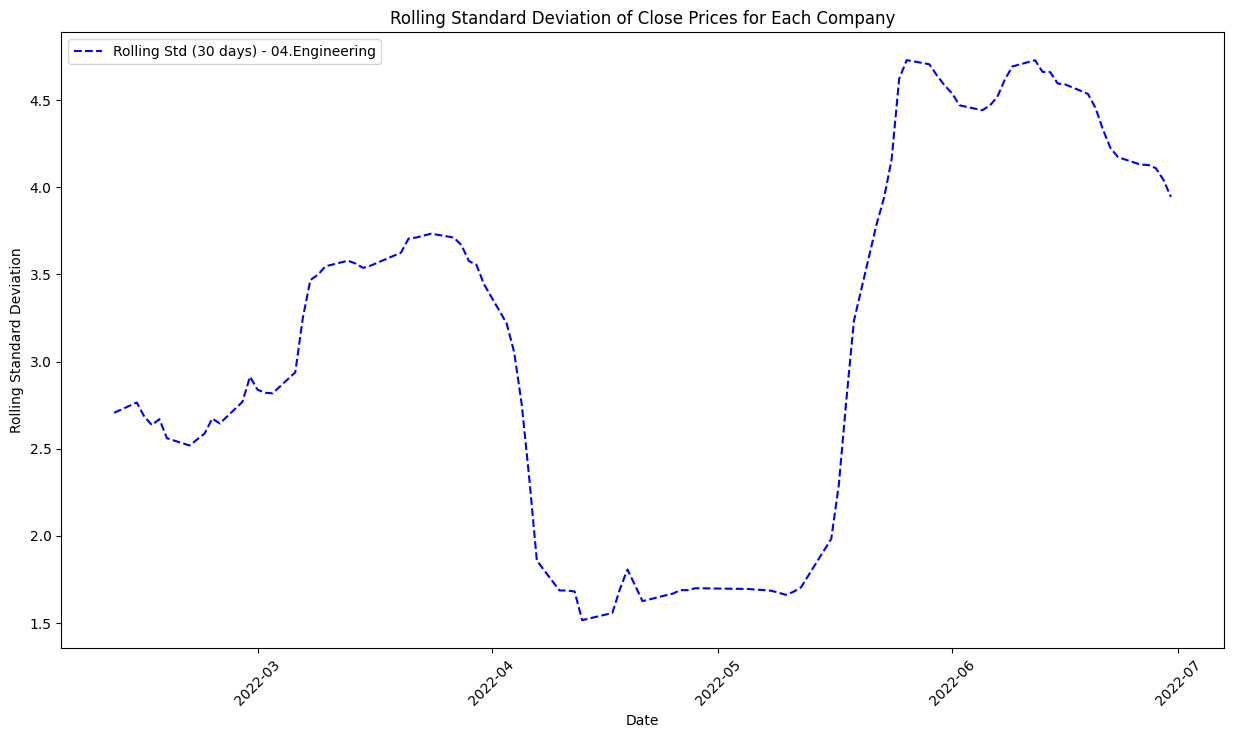

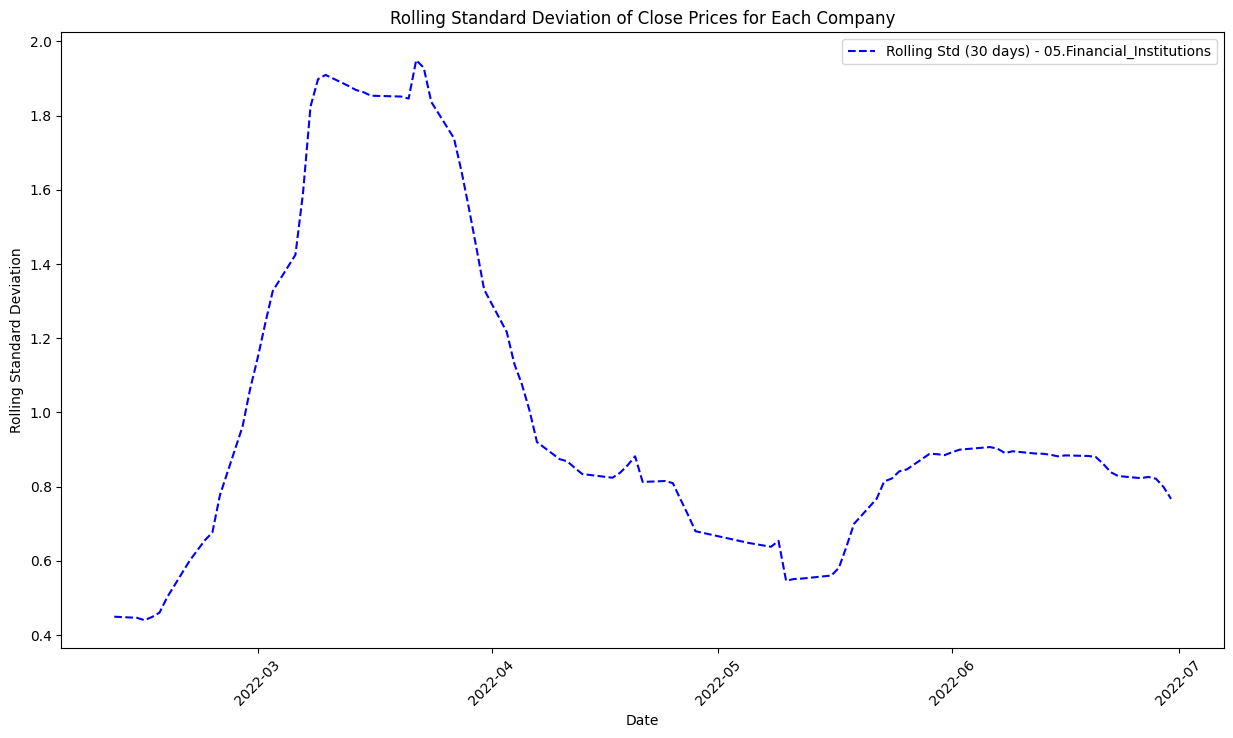

In [15]:
for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    plt.figure(figsize=(15, 8))
    rolling_std = company_data['Close'].rolling(window=30).std()
    plt.plot(company_data['Date'],rolling_std, label=f'Rolling Std (30 days) - {name}',linestyle='--',color="blue")
    plt.xlabel('Date')
    plt.ylabel('Rolling Standard Deviation')
    plt.title('Rolling Standard Deviation of Close Prices for Each Company')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

***2.Create a new column for daily price change (Close - Open)*** 

In [16]:
stock_data['daily_price_change'] = stock_data['Close'] - stock_data['Open']
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume,daily_price_change
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,0.10
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.13
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.01
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.07
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,0.25


***3.Analyze the distribution of daily price changes.***

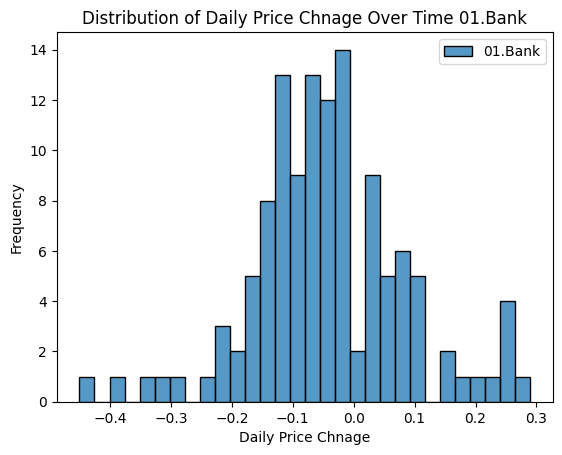

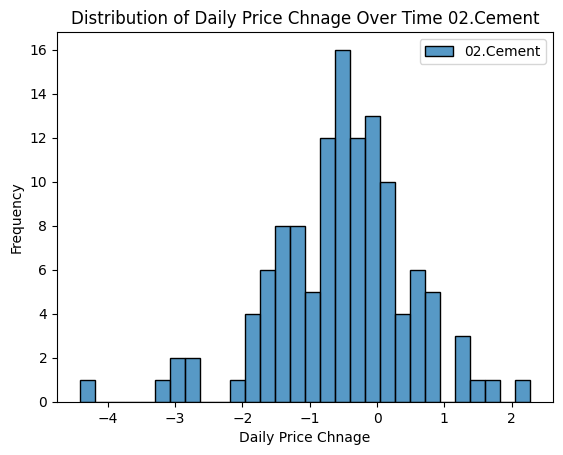

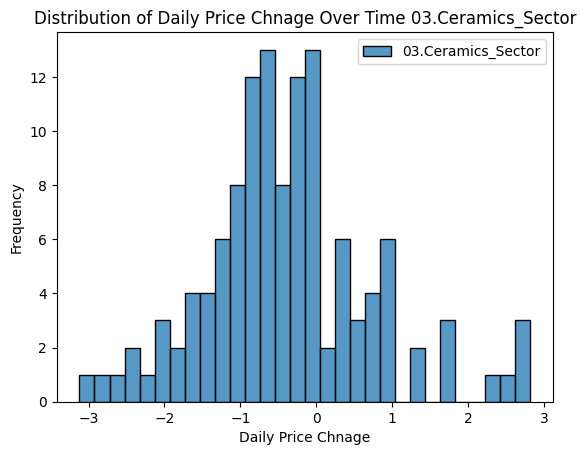

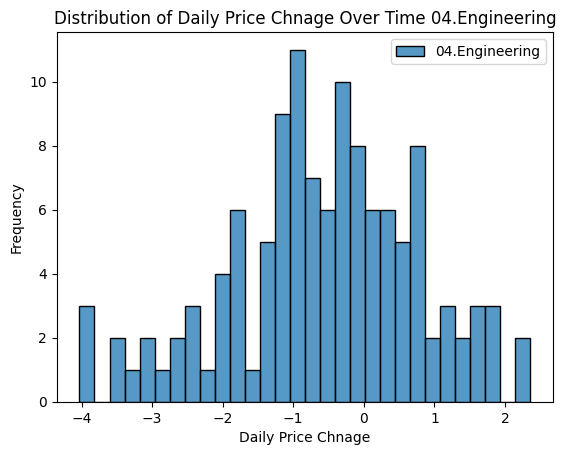

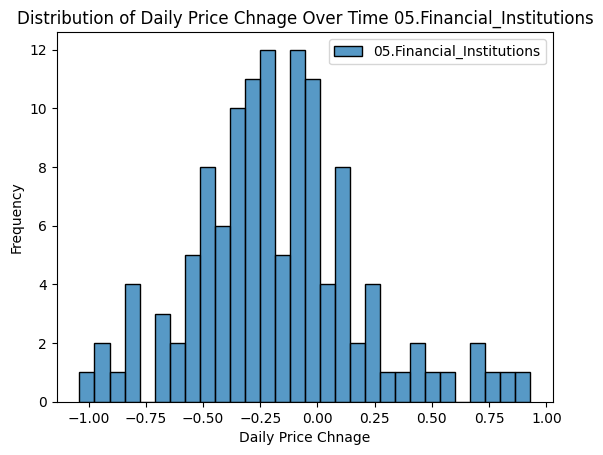

In [17]:
for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    sns.histplot(data=company_data, x='daily_price_change', bins=30, label=name)
    plt.xlabel('Daily Price Chnage')
    plt.ylabel('Frequency')
    plt.title('Distribution of Daily Price Chnage Over Time {}'.format(name))
    plt.legend()
    plt.show()

***4.Identify days with the largest price increases and decreases.***

In [18]:
sorted_data = stock_data.sort_values("daily_price_change",ascending=False)

In [19]:
largest_price_increase = sorted_data.head(1)
largest_price_increase

,Date,Name,Open,High,Low,Close,Volume,daily_price_change
48081,2022-06-29,SJIBLPBOND,4710.0,4899.0,4710.0,4897.0,101.0,187.0


In [20]:
largest_price_decrease = sorted_data.tail(1)
largest_price_decrease

,Date,Name,Open,High,Low,Close,Volume,daily_price_change
23365,2022-03-07,RECKITTBEN,5753.0,5753.0,5550.0,5563.8,1876.0,-189.2


***5.Identify stocks with unusually high trading volume on certain days.***

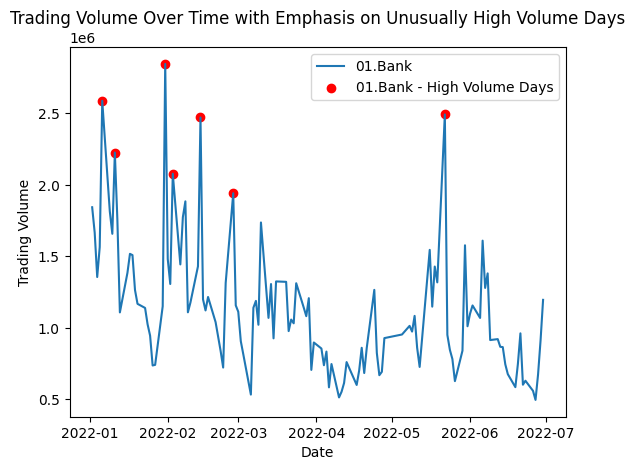

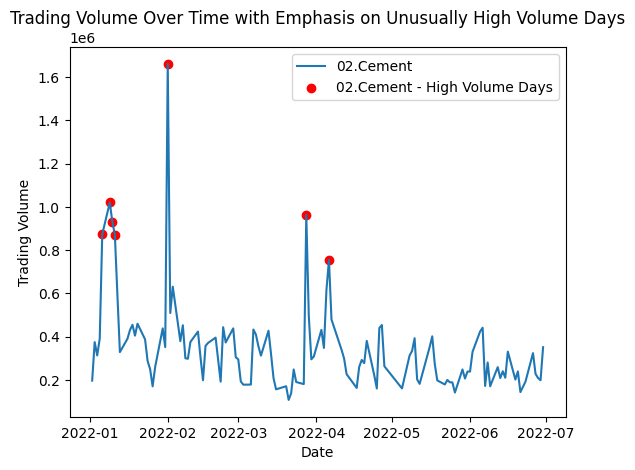

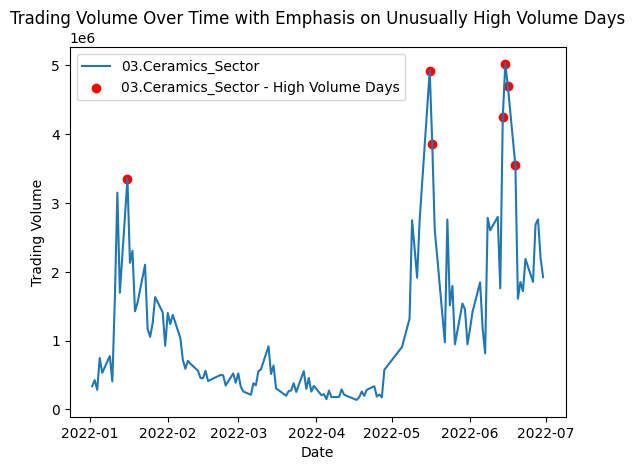

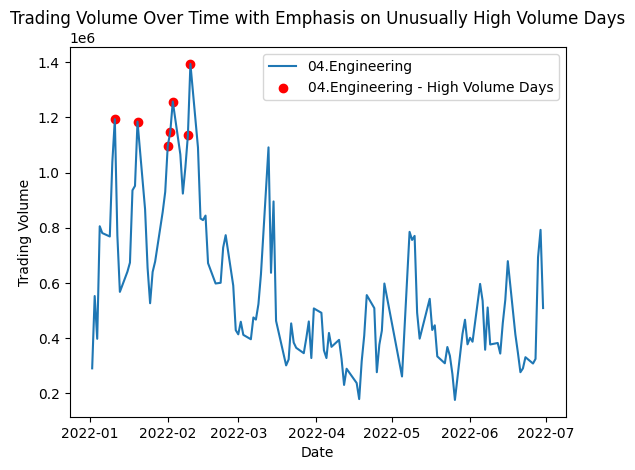

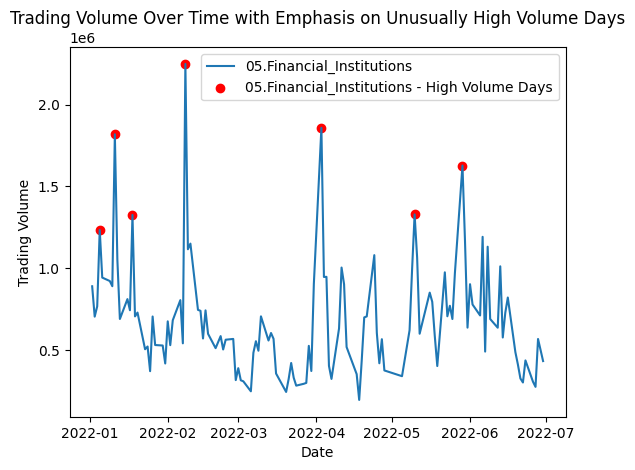

In [21]:
for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    plt.plot(company_data['Date'],company_data['Volume'],label=name)
    threshold = company_data['Volume'].quantile(0.95)
    high_volume_data = company_data[company_data['Volume'] > threshold]
    plt.scatter(high_volume_data['Date'],high_volume_data['Volume'],color="red",marker='o',label="{} - High Volume Days".format(name))
    plt.title('Trading Volume Over Time with Emphasis on Unusually High Volume Days')
    plt.xlabel('Date')
    plt.ylabel('Trading Volume')
    plt.legend()
    plt.show()
    

### Trading Volume Analysis Report

The line chart illustrates the trading volume over time . Notably, days with unusually high trading volume, represented by red dots, stand out. These instances may indicate significant market activity or events impacting the trading behavior of these stocks.

# **Part 4: Correlation and Heatmaps:**

***1.Explore the relationship between trading volume and volatility.***

In [22]:
## find the volatility/ daily pct change
stock_data['Volatility'] = stock_data.groupby("Name")['Close'].pct_change()

In [23]:
correlation_matrix = stock_data.groupby("Name")[['Volume','Volatility']].corr()

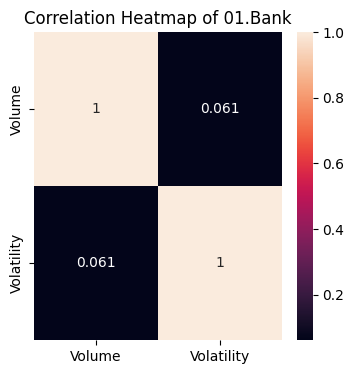

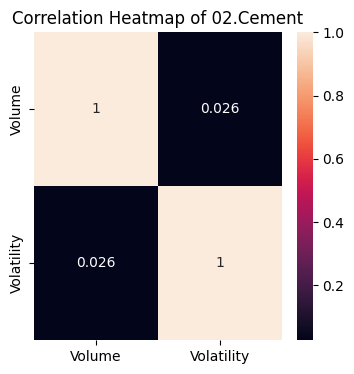

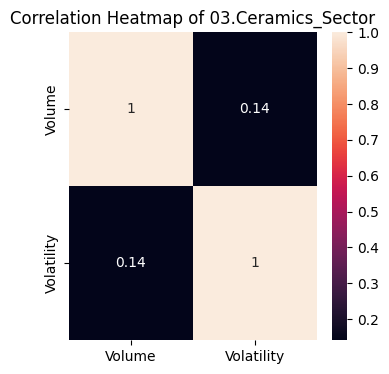

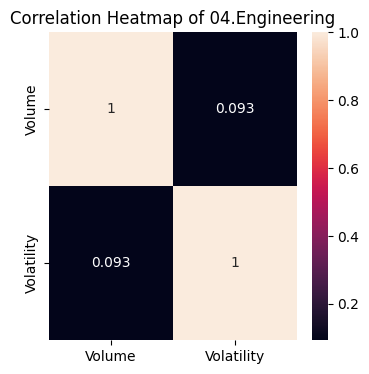

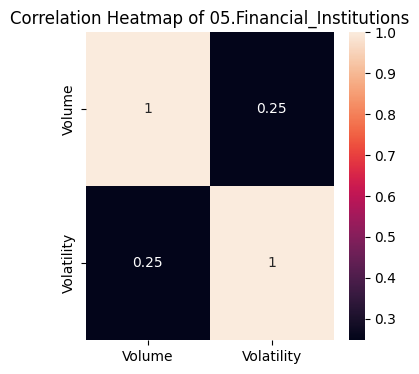

In [24]:
## showing the random 5 company correlation matrix
for name in unique_names:
    plt.figure(figsize=(4,4))
    sns.heatmap(correlation_matrix.loc[name],annot=True)
    plt.title("Correlation Heatmap of {}".format(name))
    plt.show()

***2.Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.***

In [25]:
price_columns = ['Open', 'High', 'Low', 'Close']

# Group by 'Name' and calculate the correlation matrix for each group
correlation_matrices = stock_data.groupby('Name')[price_columns].corr()

In [26]:
## showing random 5 company correlation matrix
for name in unique_names:
    print("Company Name : {}".format(name))
    print("-"*50)
    print(correlation_matrices.loc[name])
    print("-"*50)

Company Name : 01.Bank
--------------------------------------------------
           Open      High       Low     Close
Open   1.000000  0.997736  0.997456  0.995453
High   0.997736  1.000000  0.996873  0.998074
Low    0.997456  0.996873  1.000000  0.998132
Close  0.995453  0.998074  0.998132  1.000000
--------------------------------------------------
Company Name : 02.Cement
--------------------------------------------------
           Open      High       Low     Close
Open   1.000000  0.995589  0.993419  0.992501
High   0.995589  1.000000  0.992134  0.995799
Low    0.993419  0.992134  1.000000  0.996541
Close  0.992501  0.995799  0.996541  1.000000
--------------------------------------------------
Company Name : 03.Ceramics_Sector
--------------------------------------------------
           Open      High       Low     Close
Open   1.000000  0.975167  0.974133  0.952451
High   0.975167  1.000000  0.969056  0.981141
Low    0.974133  0.969056  1.000000  0.980080
Close  0.952451  0.

***3.Create a heatmap to visualize the correlations using the seaborn package.***

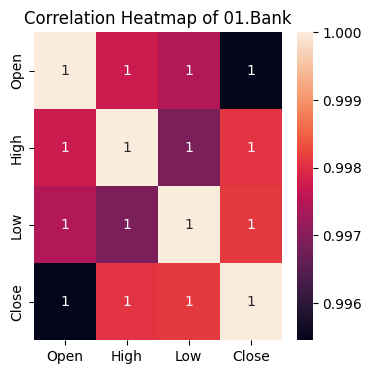

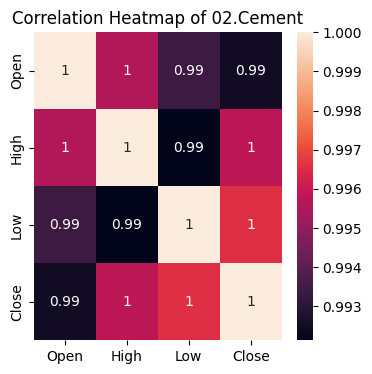

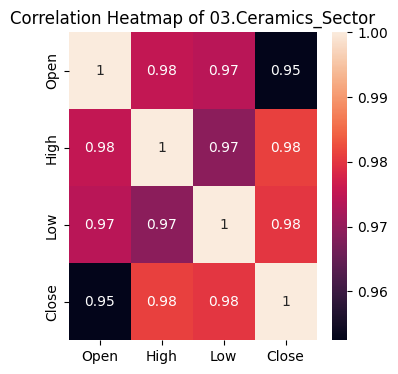

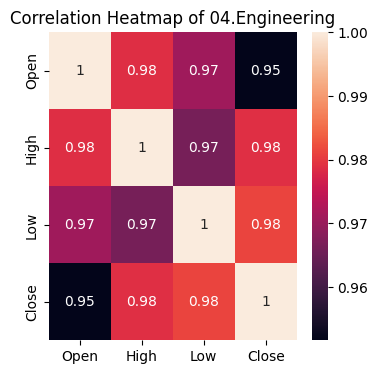

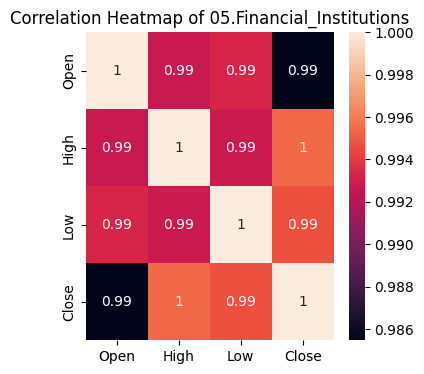

In [27]:
for name in unique_names:
    plt.figure(figsize=(4,4))
    sns.heatmap(correlation_matrices.loc[name],annot=True)
    plt.title("Correlation Heatmap of {}".format(name))
    plt.show()